### Import Library

In [74]:
import os
import zipfile
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Import Dataset

In [58]:
path = 'dataset'
isExist = os.path.exists(path)
if not isExist:
  os.makedirs(path)

In [59]:
# download zip file dataset, and put it in base dir.
zip_path = './dataset.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall(path='./dataset/')

zip_ref.close()

In [62]:
base_dir = './dataset/'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_caries_dir = os.path.join(train_dir, 'caries')
train_nocaries_dir = os.path.join(train_dir, 'no-caries')

test_caries_dir = os.path.join(test_dir, 'caries')
test_nocaries_dir = os.path.join(test_dir, 'no-caries')

In [63]:
print('total training caries images :', len(os.listdir( train_caries_dir ) ))
print('total training no caries images :', len(os.listdir( train_nocaries_dir ) ))

print('total test caries images :', len(os.listdir( test_caries_dir ) ))
print('total test no caries images :', len(os.listdir( test_nocaries_dir ) ))

total training caries images : 242
total training no caries images : 258
total test caries images : 28
total test no caries images : 4


In [64]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


train_caries_fnames = os.listdir( train_caries_dir )
train_nocaries_fnames = os.listdir( train_nocaries_dir )

nrows = 4
ncols = 4

pic_index = 0

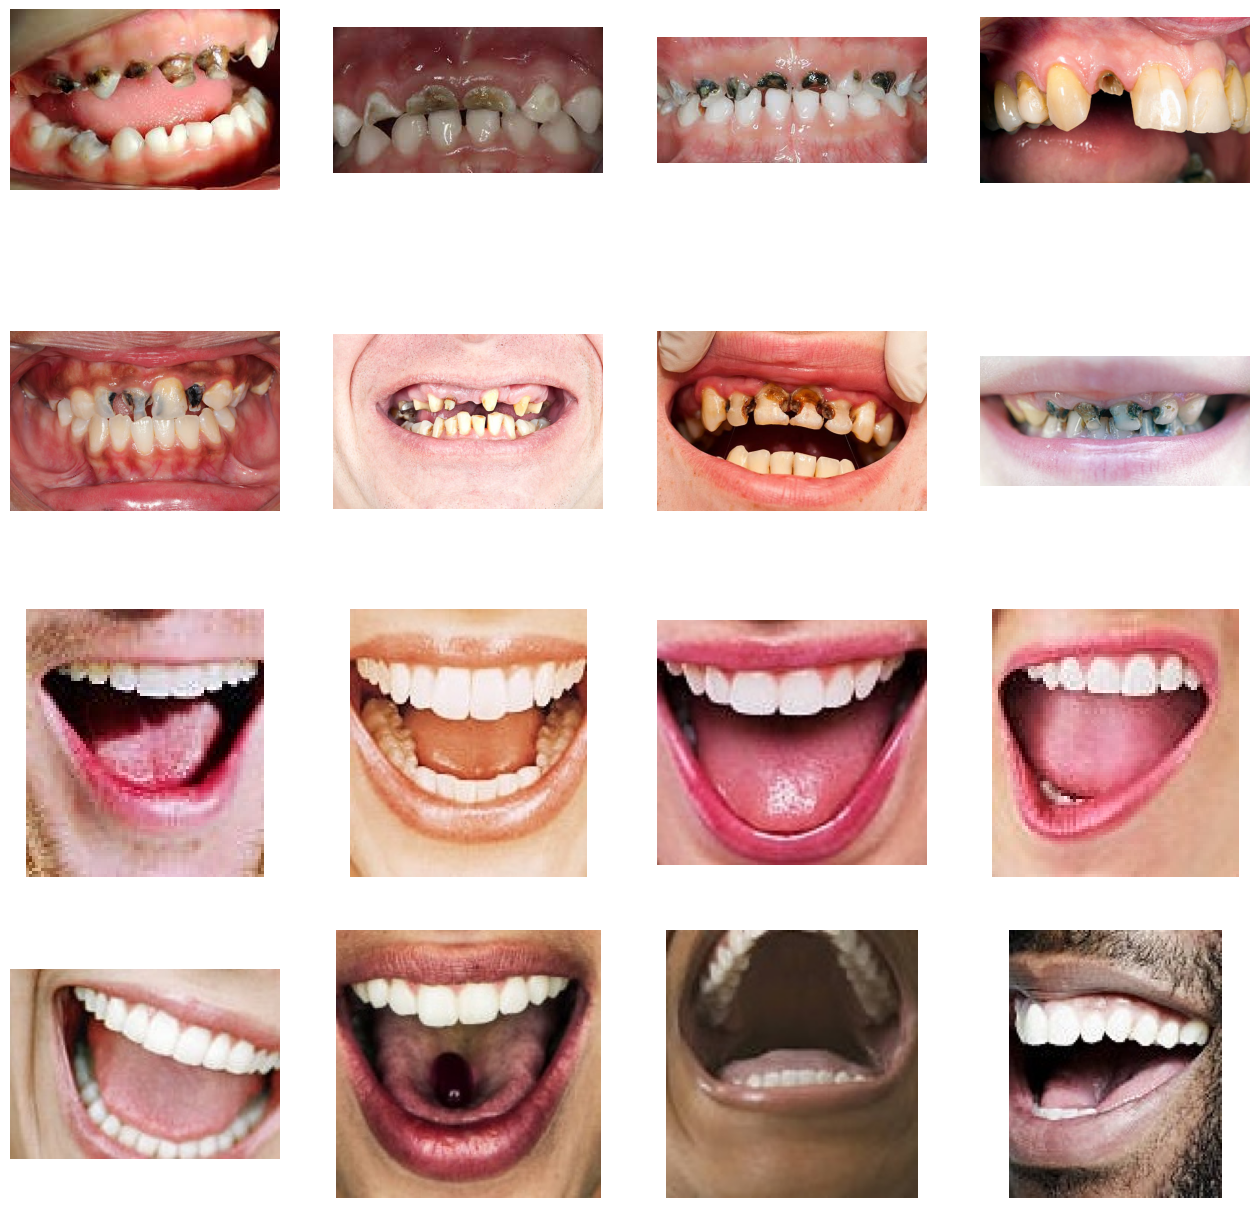

In [65]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_caries_pix = [os.path.join(train_caries_dir, fname) 
                for fname in train_caries_fnames[ pic_index-8:pic_index] 
               ]

next_nocaries_pix = [os.path.join(train_nocaries_dir, fname) 
                for fname in train_nocaries_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_caries_pix+next_nocaries_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Building Model using Transfer Learning

In [ ]:
# transfer learning
model_selection = ("mobilenet_v2", 224, 1280) 
handle_base, pixels, FV_SIZE = model_selection
IMAGE_SIZE = (pixels, pixels)

MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
feature_extractor = hub.KerasLayer(MODULE_HANDLE, input_shape=IMAGE_SIZE + (3,))
feature_extractor.trainable = False

In [42]:
# not final
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(2, activation='sigmoid') # sigmoid/softmax
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________


In [76]:
model.compile(
  optimizer = optimizers.RMSprop(learning_rate=0.0001), 
  loss = 'binary_crossentropy', 
  metrics = ['accuracy']
)

### Preprocessing Image using ImageDataGenerator

In [ ]:
# experimental ImageDatagenerator for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

### Model Training

In [77]:
history = model.fit(
  train_generator,
  validation_data = test_generator,
  steps_per_epoch = 100,
  epochs = 20,
  validation_steps = 50,
  verbose = 2)

hello world


### Evaluation

In [78]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

NameError: name 'history' is not defined